# Bangladesh Flight Fare Prediction
## Complete EDA, Modelling & Insights Notebook

**Author**: Carl Nyameakyere Crankson  
**Dataset**: [Kaggle - Flight Price Dataset of Bangladesh](https://www.kaggle.com/datasets/mahatiratusher/flight-price-dataset-of-bangladesh)  
**Goal**: Predict total flight fares using airline, route, class, and seasonal features.

---

## Notebook Structure
1. **Problem Definition** - Business context & ML task framing
2. **Data Loading & Understanding** - Initial inspection
3. **Data Cleaning & Preprocessing** - Handle nulls, types, outliers
4. **Feature Engineering** - New features, encoding, scaling
5. **Exploratory Data Analysis (EDA)** - Full visual analysis
6. **Baseline Model** - Linear Regression
7. **Advanced Models** - Ridge, Lasso, Decision Tree, Random Forest, Gradient Boost
8. **Model Comparison** - Cross-validation & evaluation
9. **Model Interpretation** - Feature importance & SHAP-style analysis
10. **Insights & Recommendations** - Business findings

---
## Setup & Imports

In [8]:
# Install dependencies if needed
# !pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm jupyter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Plotting style
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_theme(style='whitegrid', palette='husl')

RANDOM_STATE = 42
print(' All imports successful')



 All imports successful


---
## 1. Problem Definition

### Business Context
Airlines and travel platforms need to estimate ticket prices accurately for:
- **Dynamic pricing strategies** — adjust fares in real-time
- **Customer recommendations** — suggest best booking times
- **Revenue management** — forecast revenue by route and season

### ML Task Definition
| Attribute | Value |
|-----------|-------|
| **Type** | Supervised Regression |
| **Target Variable** | `total_fare_bdt` (Total Fare in BDT) |
| **Features** | Airline, Source, Destination, Class, Seasonality |
| **Evaluation** | R², MAE, RMSE |

### Key Questions to Answer
1. Which airline charges the most? The least?
2. What are the most expensive routes?
3. How much does peak season affect prices?
4. Does travel class significantly influence fare?
5. What features most strongly predict fare?

---
## 2. Data Loading & Understanding

In [11]:
import pandas as pd
# Load dataset - update path if needed
DATA_PATH = 'C:\\Users\\CarlNyameakyereCrank\\Downloads\\DEM09\\flight_price_pipeline\\data\\Flight_Price_Dataset_of_Bangladesh.csv'

df_raw = pd.read_csv(DATA_PATH)
print(f' Dataset Shape: {df_raw.shape[0]:,} rows {df_raw.shape[1]} columns')
df_raw.head()

 Dataset Shape: 57,000 rows 17 columns


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.22,Direct,Airbus A320,Economy,Online Website,"21,131.23","5,169.68","26,300.91",Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.61,Direct,Airbus A320,First Class,Travel Agency,"11,605.40",200.00,"11,805.40",Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.69,1 Stop,Boeing 787,Economy,Travel Agency,"39,882.50","11,982.37","51,864.87",Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.69,Direct,Airbus A320,Economy,Direct Booking,"4,435.61",200.00,"4,635.61",Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.06,1 Stop,Airbus A350,Business,Direct Booking,"59,243.81","14,886.57","74,130.38",Regular,90


In [12]:
# Data types and nulls
print('=== Data Types & Missing Values ===')
info_df = pd.DataFrame({
    'dtype': df_raw.dtypes,
    'null_count': df_raw.isnull().sum(),
    'null_%': (df_raw.isnull().sum() / len(df_raw) * 100).round(2),
    'unique_values': df_raw.nunique()
})
print(info_df.to_string())

=== Data Types & Missing Values ===
                         dtype  null_count  null_%  unique_values
Airline                    str           0    0.00             24
Source                     str           0    0.00              8
Source Name                str           0    0.00              8
Destination                str           0    0.00             20
Destination Name           str           0    0.00             20
Departure Date & Time      str           0    0.00          54126
Arrival Date & Time        str           0    0.00          56944
Duration (hrs)         float64           0    0.00          53135
Stopovers                  str           0    0.00              3
Aircraft Type              str           0    0.00              5
Class                      str           0    0.00              3
Booking Source             str           0    0.00              3
Base Fare (BDT)        float64           0    0.00          57000
Tax & Surcharge (BDT)  float64          

In [17]:
# Statistical summary
print('=== Descriptive Statistics ===')
df_raw.describe(include='all')

=== Descriptive Statistics ===


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
count,57000,57000,57000,57000,57000,57000,57000,"57,000.00",57000,57000,57000,57000,"57,000.00","57,000.00","57,000.00",57000,"57,000.00"
unique,24,8,8,20,20,54126,56944,NaN,3,5,3,3,NaN,NaN,NaN,4,NaN
top,US-Bangla Airlines,CGP,"Shah Amanat International Airport, Chittagong",JED,"King Abdulaziz International Airport, Jeddah",2025-11-15 15:33:00,2025-08-06 03:24:03,NaN,Direct,Airbus A320,Economy,Direct Booking,NaN,NaN,NaN,Regular,NaN
freq,4496,7241,7241,3071,3071,4,2,NaN,36642,23970,19112,19111,NaN,NaN,NaN,44525,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99,NaN,NaN,NaN,NaN,"58,899.56","11,448.24","71,030.32",NaN,45.46
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.09,NaN,NaN,NaN,NaN,"68,840.61","12,124.34","81,769.20",NaN,26.02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,"1,600.98",200.00,"1,800.98",NaN,1.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,"8,856.32",200.00,"9,602.70",NaN,23.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.64,NaN,NaN,NaN,NaN,"31,616.00","9,450.94","41,307.54",NaN,45.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.49,NaN,NaN,NaN,NaN,"85,722.93","17,513.05","103,800.91",NaN,68.00


In [18]:
# Unique values for categorical columns
cat_cols = df_raw.select_dtypes(include='object').columns
for col in cat_cols:
    print(f'\n{col} ({df_raw[col].nunique()} unique):')
    print(df_raw[col].value_counts().head(10).to_string())


Airline (24 unique):
Airline
US-Bangla Airlines           4496
Vistara                      2368
Lufthansa                    2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Emirates                     2327
Saudia                       2321
Thai Airways                 2316
AirAsia                      2312
Air Astra                    2304

Source (8 unique):
Source
CGP    7241
ZYL    7179
JSR    7149
DAC    7146
BZL    7102
RJH    7091
CXB    7049
SPD    7043

Source Name (8 unique):
Source Name
Shah Amanat International Airport, Chittagong    7241
Osmani International Airport, Sylhet             7179
Jessore Airport                                  7149
Hazrat Shahjalal International Airport, Dhaka    7146
Barisal Airport                                  7102
Shah Makhdum Airport, Rajshahi                   7091
Cox's Bazar Airport                              7049
Saidpur Airport                                  7043

Destination (20 unique):
Destination


---
## 3. Data Cleaning & Preprocessing

In [19]:
df = df_raw.copy()

# ── 3.1 Rename columns to snake_case ──────────────────────────────────────
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('&', 'and')
)
print('Columns after rename:')
print(df.columns.tolist())

Columns after rename:
['airline', 'source', 'source_name', 'destination', 'destination_name', 'departure_date_and_time', 'arrival_date_and_time', 'duration_(hrs)', 'stopovers', 'aircraft_type', 'class', 'booking_source', 'base_fare_(bdt)', 'tax_and_surcharge_(bdt)', 'total_fare_(bdt)', 'seasonality', 'days_before_departure']


In [20]:
# ── 3.2 Drop irrelevant columns ────────────────────────────────────────────
drop_cols = [c for c in df.columns if 'unnamed' in c.lower() or 'index' == c.lower()]
if drop_cols:
    df.drop(columns=drop_cols, inplace=True)
    print(f'Dropped: {drop_cols}')

print(f'Shape after cleanup: {df.shape}')

Shape after cleanup: (57000, 17)


In [21]:
# ── 3.3 Identify key columns ───────────────────────────────────────────────
# Adjust these to match your actual column names
print('Current columns:', df.columns.tolist())

# Map to standard names used throughout notebook
# Common name variations from this dataset:
rename_map = {}

# Try to find fare column
for col in df.columns:
    if 'total' in col and 'fare' in col: rename_map[col] = 'total_fare_bdt'
    elif 'base' in col and 'fare' in col: rename_map[col] = 'base_fare'
    elif 'tax' in col: rename_map[col] = 'tax_surcharge'
    elif col in ['airline', 'airlines']: rename_map[col] = 'airline'
    elif 'source' in col and 'code' not in col: rename_map[col] = 'source_city'
    elif 'destination' in col and 'code' not in col: rename_map[col] = 'destination_city'
    elif 'class' in col: rename_map[col] = 'travel_class'
    elif 'season' in col and 'peak' not in col: rename_map[col] = 'seasonality'

df.rename(columns=rename_map, inplace=True)
print('\nAfter renaming:', df.columns.tolist())

Current columns: ['airline', 'source', 'source_name', 'destination', 'destination_name', 'departure_date_and_time', 'arrival_date_and_time', 'duration_(hrs)', 'stopovers', 'aircraft_type', 'class', 'booking_source', 'base_fare_(bdt)', 'tax_and_surcharge_(bdt)', 'total_fare_(bdt)', 'seasonality', 'days_before_departure']

After renaming: ['airline', 'source_city', 'source_city', 'destination_city', 'destination_city', 'departure_date_and_time', 'arrival_date_and_time', 'duration_(hrs)', 'stopovers', 'aircraft_type', 'travel_class', 'source_city', 'base_fare', 'tax_surcharge', 'total_fare_bdt', 'seasonality', 'days_before_departure']


In [22]:
# ── 3.4 Fix data types ─────────────────────────────────────────────────────
fare_cols = ['total_fare_bdt', 'base_fare', 'tax_surcharge']
for col in fare_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print('Fare column dtypes:')
for col in fare_cols:
    if col in df.columns:
        print(f'  {col}: {df[col].dtype}')

Fare column dtypes:
  total_fare_bdt: float64
  base_fare: float64
  tax_surcharge: float64


In [34]:
# ── 3.5 Handle invalid entries ─────────────────────────────────────────────
before = len(df)

# Remove negative or zero fares
if 'total_fare_bdt' in df.columns:
    df = df[df['total_fare_bdt'] > 0]
    print(f'Removed {before - len(df)} records with non-positive fares')

print(f'\nMissing values before cleanup: {df.isnull().sum().sum()}')

# Fill numeric with median (vectorized - faster)
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode or 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode_values = df[col].mode()
    fill_value = mode_values.iloc[0] if len(mode_values) > 0 else 'Unknown'  # ✅ Use .iloc[0]
    df[col] = df[col].fillna(fill_value)

print(f'Missing values after cleanup: {df.isnull().sum().sum()}')
print(f'Final shape: {df.shape}')


Removed 0 records with non-positive fares

Missing values before cleanup: 0
Missing values after cleanup: 0
Final shape: (57000, 17)


In [41]:
# Check what type df[col] returns
str_cols = df.select_dtypes(include='object').columns
print(f"Number of string columns: {len(str_cols)}")
print(f"String columns: {list(str_cols)}")

# Test on first column
if len(str_cols) > 0:
    first_col = str_cols[0]
    print(f"\nType of df['{first_col}']: {type(df[first_col])}")
    print(f"First few values:\n{df[first_col].head()}")


Number of string columns: 12
String columns: ['airline', 'source_city', 'source_city', 'destination_city', 'destination_city', 'departure_date_and_time', 'arrival_date_and_time', 'stopovers', 'aircraft_type', 'travel_class', 'source_city', 'seasonality']

Type of df['airline']: <class 'pandas.Series'>
First few values:
0    Malaysian Airlines
1        Cathay Pacific
2       British Airways
3    Singapore Airlines
4       British Airways
Name: airline, dtype: str


Outliers detected (3×IQR rule): 126 (0.22%)
Fare range (3×IQR): -272,992 – 386,396 BDT


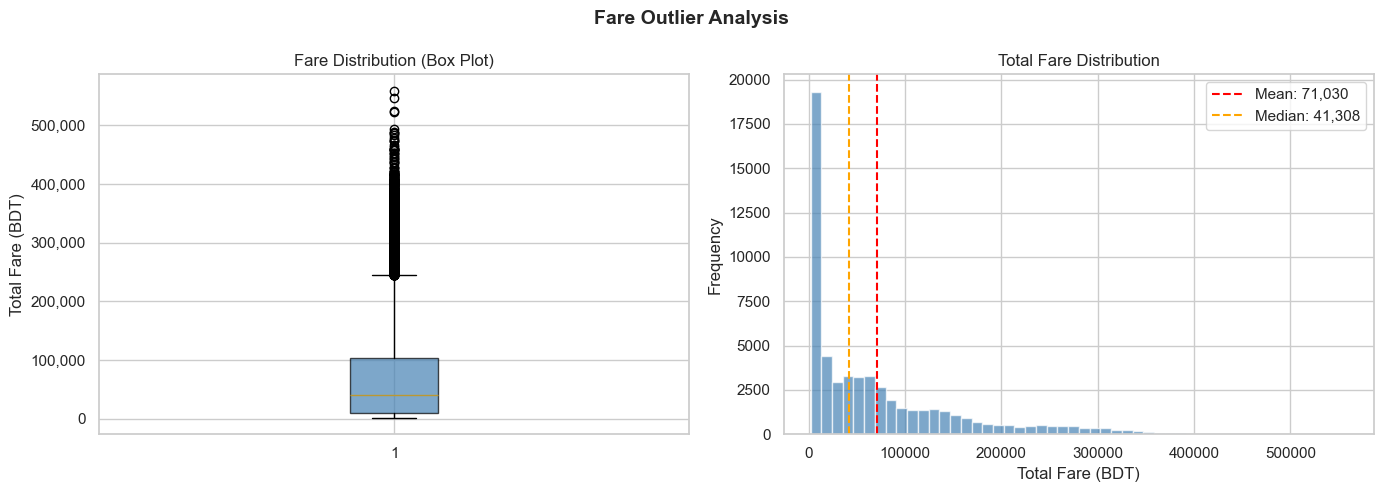

In [42]:
# ── 3.7 Outlier detection ──────────────────────────────────────────────────
if 'total_fare_bdt' in df.columns:
    Q1 = df['total_fare_bdt'].quantile(0.25)
    Q3 = df['total_fare_bdt'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR

    outliers = df[(df['total_fare_bdt'] < lower) | (df['total_fare_bdt'] > upper)]
    print(f'Outliers detected (3×IQR rule): {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)')
    print(f'Fare range (3×IQR): {lower:,.0f} – {upper:,.0f} BDT')

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].boxplot(df['total_fare_bdt'].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='steelblue', alpha=0.7))
    axes[0].set_title('Fare Distribution (Box Plot)')
    axes[0].set_ylabel('Total Fare (BDT)')
    axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    axes[1].hist(df['total_fare_bdt'], bins=50, color='steelblue', alpha=0.7, edgecolor='white')
    axes[1].axvline(df['total_fare_bdt'].mean(), color='red', linestyle='--', label=f"Mean: {df['total_fare_bdt'].mean():,.0f}")
    axes[1].axvline(df['total_fare_bdt'].median(), color='orange', linestyle='--', label=f"Median: {df['total_fare_bdt'].median():,.0f}")
    axes[1].set_title('Total Fare Distribution')
    axes[1].set_xlabel('Total Fare (BDT)')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    plt.suptitle('Fare Outlier Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('fare_outlier_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

---
## 4. Feature Engineering

In [46]:
# Remove duplicate columns BEFORE feature engineering
df = df.loc[:, ~df.columns.duplicated()]
print(f"Shape after removing duplicate columns: {df.shape}")
print("\nColumns after deduplication:")
print(df.columns.tolist())

# ── 4.1 Derived features ───────────────────────────────────────────────────

# Route
if 'source_city' in df.columns and 'destination_city' in df.columns:
    df['route'] = df['source_city'] + ' → ' + df['destination_city']
elif 'source_code' in df.columns and 'destination_code' in df.columns:
    df['route'] = df['source_code'] + ' → ' + df['destination_code']

# Route type (domestic / international)
domestic_codes = ['DAC', 'CGP', 'CXB', 'ZYL', 'JSR', 'RJH', 'SPD', 'BZL']
if 'source_code' in df.columns and 'destination_code' in df.columns:
    df['route_type'] = np.where(
        df['source_code'].isin(domestic_codes) & df['destination_code'].isin(domestic_codes),
        'Domestic', 'International'
    )

# Peak season flag
if 'seasonality' in df.columns and 'is_peak_season' not in df.columns:
    peak_keywords = ['peak', 'eid', 'hajj', 'holiday', 'festival', 'winter']
    df['is_peak_season'] = df['seasonality'].str.lower().apply(
        lambda x: any(k in x for k in peak_keywords)
    ).astype(int)

# Total fare from components if missing
if 'total_fare_bdt' not in df.columns:
    if 'base_fare' in df.columns and 'tax_surcharge' in df.columns:
        df['total_fare_bdt'] = df['base_fare'] + df['tax_surcharge']

# Fare category (binned)
if 'total_fare_bdt' in df.columns:
    df['fare_category'] = pd.cut(
        df['total_fare_bdt'],
        bins=[0, 10000, 30000, 60000, 100000, float('inf')],
        labels=['Budget (<10K)', 'Economy (10-30K)', 'Standard (30-60K)',
                'Premium (60-100K)', 'Luxury (>100K)']
    )

print(f'\nShape after feature engineering: {df.shape}')
print(f'New columns: route, route_type, is_peak_season, fare_category')
df.head(3)


Shape after removing duplicate columns: (57000, 14)

Columns after deduplication:
['airline', 'source_city', 'destination_city', 'departure_date_and_time', 'arrival_date_and_time', 'duration_(hrs)', 'stopovers', 'aircraft_type', 'travel_class', 'base_fare', 'tax_surcharge', 'total_fare_bdt', 'seasonality', 'days_before_departure']

Shape after feature engineering: (57000, 17)
New columns: route, route_type, is_peak_season, fare_category


,airline,source_city,destination_city,departure_date_and_time,arrival_date_and_time,duration_(hrs),stopovers,aircraft_type,travel_class,base_fare,tax_surcharge,total_fare_bdt,seasonality,days_before_departure,route,is_peak_season,fare_category
0,Malaysian Airlines,CXB,CCU,2025-11-17 06:25:00,2025-11-17 07:38:10,1.22,Direct,Airbus A320,Economy,"21,131.23","5,169.68","26,300.91",Regular,10,CXB → CCU,0,Economy (10-30K)
1,Cathay Pacific,BZL,CGP,2025-03-16 00:17:00,2025-03-16 00:53:31,0.61,Direct,Airbus A320,First Class,"11,605.40",200.00,"11,805.40",Regular,14,BZL → CGP,0,Economy (10-30K)
2,British Airways,ZYL,KUL,2025-12-13 12:03:00,2025-12-13 14:44:22,2.69,1 Stop,Boeing 787,Economy,"39,882.50","11,982.37","51,864.87",Winter Holidays,83,ZYL → KUL,1,Standard (30-60K)


In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   airline                  57000 non-null  str     
 1   source_city              57000 non-null  str     
 2   destination_city         57000 non-null  str     
 3   departure_date_and_time  57000 non-null  str     
 4   arrival_date_and_time    57000 non-null  str     
 5   duration_(hrs)           57000 non-null  float64 
 6   stopovers                57000 non-null  str     
 7   aircraft_type            57000 non-null  str     
 8   travel_class             57000 non-null  str     
 9   base_fare                57000 non-null  float64 
 10  tax_surcharge            57000 non-null  float64 
 11  total_fare_bdt           57000 non-null  float64 
 12  seasonality              57000 non-null  str     
 13  days_before_departure    57000 non-null  int64   
 14  route            

In [ ]:
# ── 4.2 Encode for modelling ───────────────────────────────────────────────
df_model = df.copy()

# Identify ML feature columns
feature_cols = []
possible_features = ['airline', 'source_code', 'destination_code', 'travel_class',
                     'seasonality', 'is_peak_season', 'route_type']

for col in possible_features:
    if col in df_model.columns:
        feature_cols.append(col)

target_col = 'total_fare_bdt'
print(f'Feature columns: {feature_cols}')
print(f'Target: {target_col}')

# Label encode categoricals
label_encoders = {}
encoded_features = []  # Will contain ONLY encoded column names

for col in feature_cols:
    if df_model[col].dtype == 'object' or str(df_model[col].dtype) == 'category':
        le = LabelEncoder()
        encoded_col = f'{col}_encoded'
        df_model[encoded_col] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le
        encoded_features.append(encoded_col)  # Add encoded version
    else:
        # Numeric columns (like is_peak_season) use as-is
        encoded_features.append(col)

print(f'\nEncoded features: {encoded_features}')

# Verify all encoded features are numeric
print('\nData types of encoded features:')
for col in encoded_features:
    if col in df_model.columns:
        print(f'  {col}: {df_model[col].dtype}')
        if df_model[col].dtype == 'object':
            print(f'    WARNING: {col} is still object type!')

# Verify all are numeric
numeric_check = all(df_model[col].dtype in ['int64', 'float64', 'int32', 'float32'] 
                   for col in encoded_features if col in df_model.columns)
print(f'\n✅ All encoded features are numeric: {numeric_check}')

print(f'\nSample of encoded data:')
print(df_model[encoded_features].head(3))

In [ ]:
# ── 4.3 Train-test split ───────────────────────────────────────────────────
X = df_model[encoded_features].copy()
y = df_model[target_col].copy()

# Verify X contains only numeric data
print(f'\nX shape: {X.shape}')
print(f'X data types:')
print(X.dtypes)

# Check for any remaining non-numeric columns
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    raise ValueError(f'ERROR: Non-numeric columns found: {non_numeric}. Check encoding step.')

print(f'\n✅ All features are numeric')
print(f'\nSample:')
print(X.head(3))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'\nTraining set: {X_train.shape[0]:,} samples')
print(f'Test set:     {X_test.shape[0]:,} samples')
print(f'Features:     {X_train.shape[1]}')

---
## 5. Exploratory Data Analysis (EDA)
### 5.1 Fare Distribution

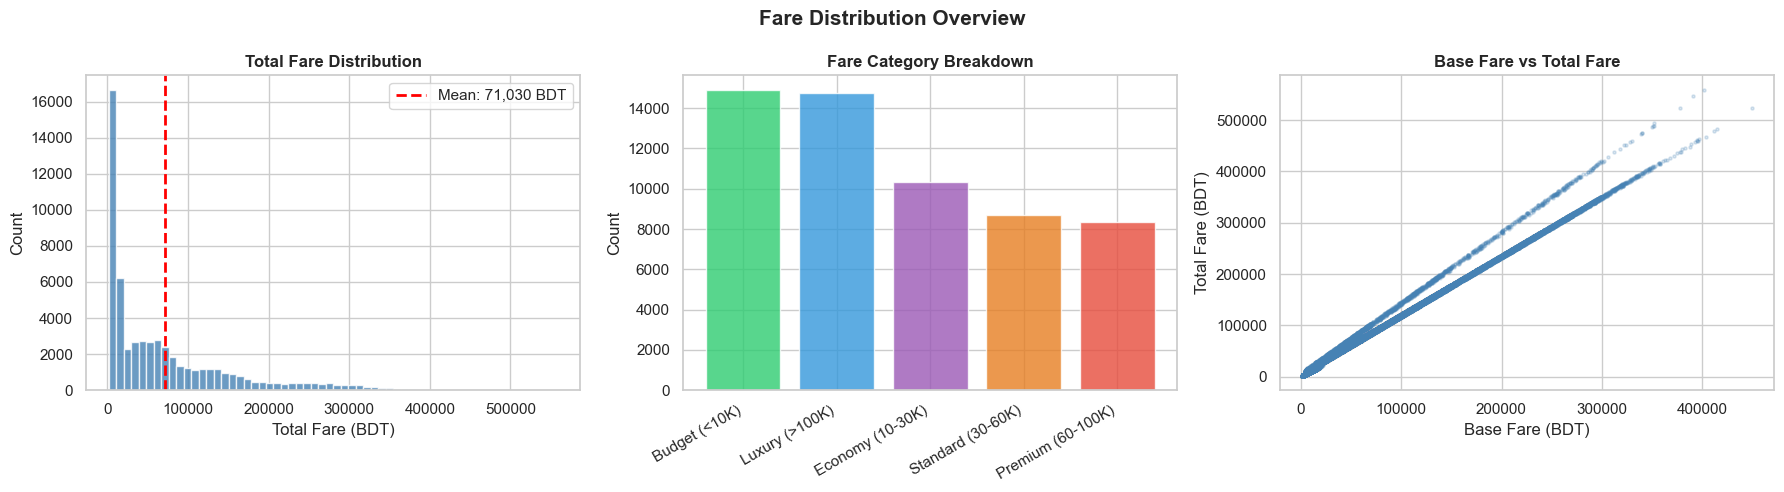


 Fare Summary Statistics:
count    57,000.00
mean     71,030.32
std      81,769.20
min       1,800.98
25%       9,602.70
50%      41,307.54
75%     103,800.91
max     558,987.33


In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total fare histogram
axes[0].hist(df['total_fare_bdt'], bins=60, color='steelblue', alpha=0.8, edgecolor='white')
axes[0].axvline(df['total_fare_bdt'].mean(), color='red', linewidth=2, linestyle='--',
                label=f"Mean: {df['total_fare_bdt'].mean():,.0f} BDT")
axes[0].set_title('Total Fare Distribution', fontweight='bold')
axes[0].set_xlabel('Total Fare (BDT)')
axes[0].set_ylabel('Count')
axes[0].legend()

# Fare category breakdown
if 'fare_category' in df.columns:
    fare_cat_counts = df['fare_category'].value_counts()
    colors = ['#2ecc71', '#3498db', '#9b59b6', '#e67e22', '#e74c3c']
    axes[1].bar(range(len(fare_cat_counts)), fare_cat_counts.values, color=colors[:len(fare_cat_counts)], alpha=0.8)
    axes[1].set_xticks(range(len(fare_cat_counts)))
    axes[1].set_xticklabels(fare_cat_counts.index, rotation=30, ha='right')
    axes[1].set_title('Fare Category Breakdown', fontweight='bold')
    axes[1].set_ylabel('Count')

# Base fare vs tax (if available)
if 'base_fare' in df.columns and 'tax_surcharge' in df.columns:
    axes[2].scatter(df['base_fare'], df['total_fare_bdt'], alpha=0.2,
                   color='steelblue', s=5)
    axes[2].set_title('Base Fare vs Total Fare', fontweight='bold')
    axes[2].set_xlabel('Base Fare (BDT)')
    axes[2].set_ylabel('Total Fare (BDT)')
else:
    axes[2].text(0.5, 0.5, 'Base Fare\nNot Available\nin Dataset',
                ha='center', va='center', transform=axes[2].transAxes,
                fontsize=14, color='gray')
    axes[2].set_title('Base Fare vs Total Fare', fontweight='bold')

plt.suptitle('Fare Distribution Overview', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('fare_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\n Fare Summary Statistics:')
print(df['total_fare_bdt'].describe().to_string())

### 5.2 Average Fare by Airline

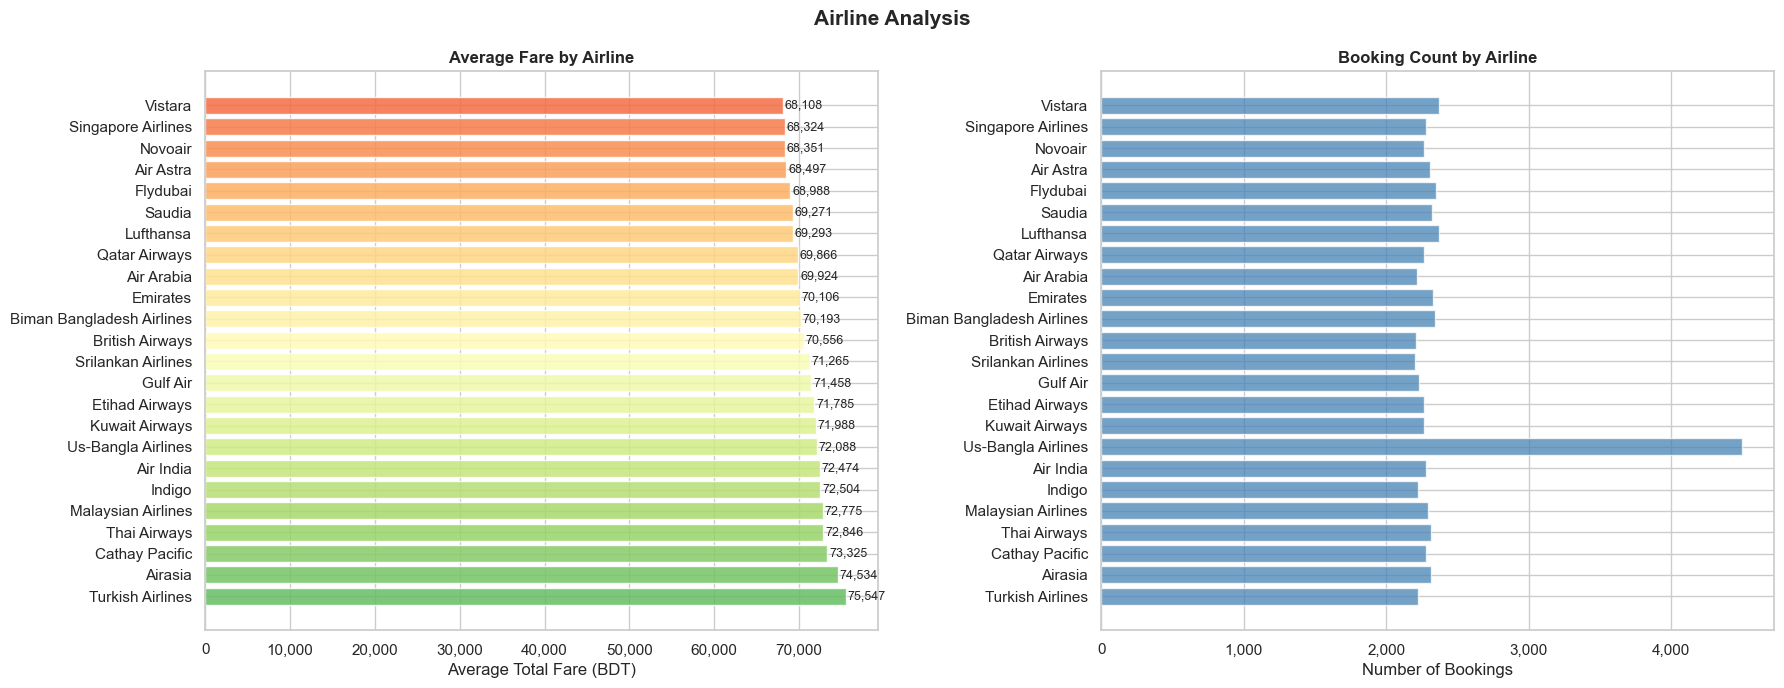


 Airline Fare Statistics:
                           avg_fare  median_fare  min_fare   max_fare  booking_count
airline                                                                             
Turkish Airlines          75,547.27    43,172.68  1,842.79 558,987.33           2220
Airasia                   74,534.39    42,763.82  1,804.13 415,248.03           2312
Cathay Pacific            73,325.09    46,282.46  1,805.89 419,822.09           2282
Thai Airways              72,845.79    42,898.83  1,814.62 447,814.56           2316
Malaysian Airlines        72,775.18    41,938.11  1,872.76 482,855.60           2292
Indigo                    72,504.43    42,018.49  1,809.27 524,278.76           2223
Air India                 72,474.18    42,429.62  1,816.37 404,646.53           2280
Us-Bangla Airlines        72,088.29    41,255.33  1,801.20 437,270.96           4496
Kuwait Airways            71,988.28    39,584.26  1,806.92 458,420.04           2262
Etihad Airways            71,785.24   

In [55]:
if 'airline' in df.columns:
    airline_stats = df.groupby('airline')['total_fare_bdt'].agg(
        avg_fare='mean',
        median_fare='median',
        min_fare='min',
        max_fare='max',
        booking_count='count'
    ).sort_values('avg_fare', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Average fare bar chart
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(airline_stats)))
    bars = axes[0].barh(airline_stats.index, airline_stats['avg_fare'],
                        color=colors, alpha=0.85, edgecolor='white')
    axes[0].set_xlabel('Average Total Fare (BDT)')
    axes[0].set_title('Average Fare by Airline', fontweight='bold')
    for bar, val in zip(bars, airline_stats['avg_fare']):
        axes[0].text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
                    f'{val:,.0f}', va='center', fontsize=9)
    axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Booking count
    axes[1].barh(airline_stats.index, airline_stats['booking_count'],
                 color='steelblue', alpha=0.75, edgecolor='white')
    axes[1].set_xlabel('Number of Bookings')
    axes[1].set_title('Booking Count by Airline', fontweight='bold')
    axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.suptitle('Airline Analysis', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('airline_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    print('\n Airline Fare Statistics:')
    print(airline_stats.to_string())

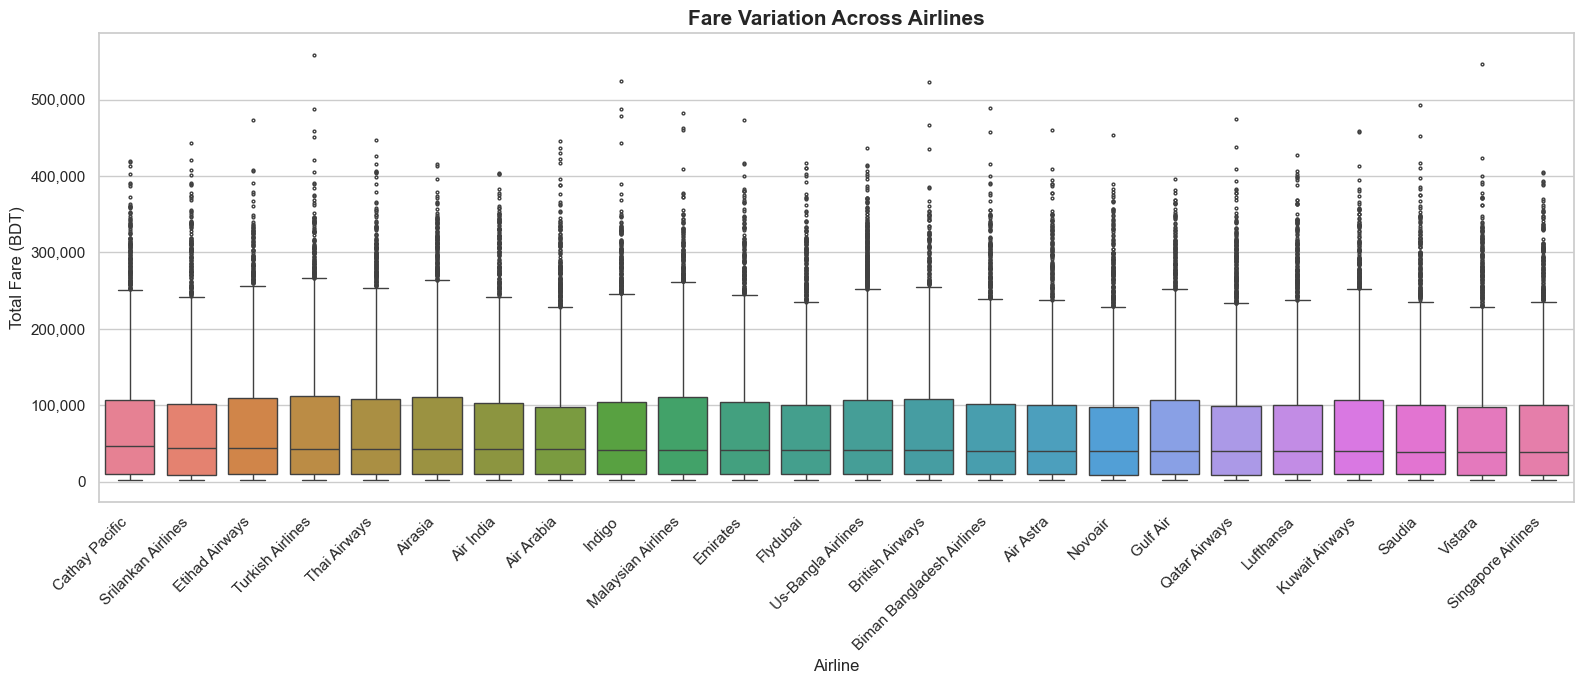

In [56]:
# Fare variation by airline (boxplot)
if 'airline' in df.columns:
    airline_order = df.groupby('airline')['total_fare_bdt'].median().sort_values(ascending=False).index

    plt.figure(figsize=(16, 7))
    df_plot = df[df['airline'].isin(airline_order)]
    sns.boxplot(data=df_plot, x='airline', y='total_fare_bdt',
                order=airline_order, palette='husl', fliersize=2)
    plt.xticks(rotation=45, ha='right')
    plt.title('Fare Variation Across Airlines', fontsize=15, fontweight='bold')
    plt.xlabel('Airline')
    plt.ylabel('Total Fare (BDT)')
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.tight_layout()
    plt.savefig('airline_fare_boxplot.png', dpi=150, bbox_inches='tight')
    plt.show()

### 5.3 Route Analysis

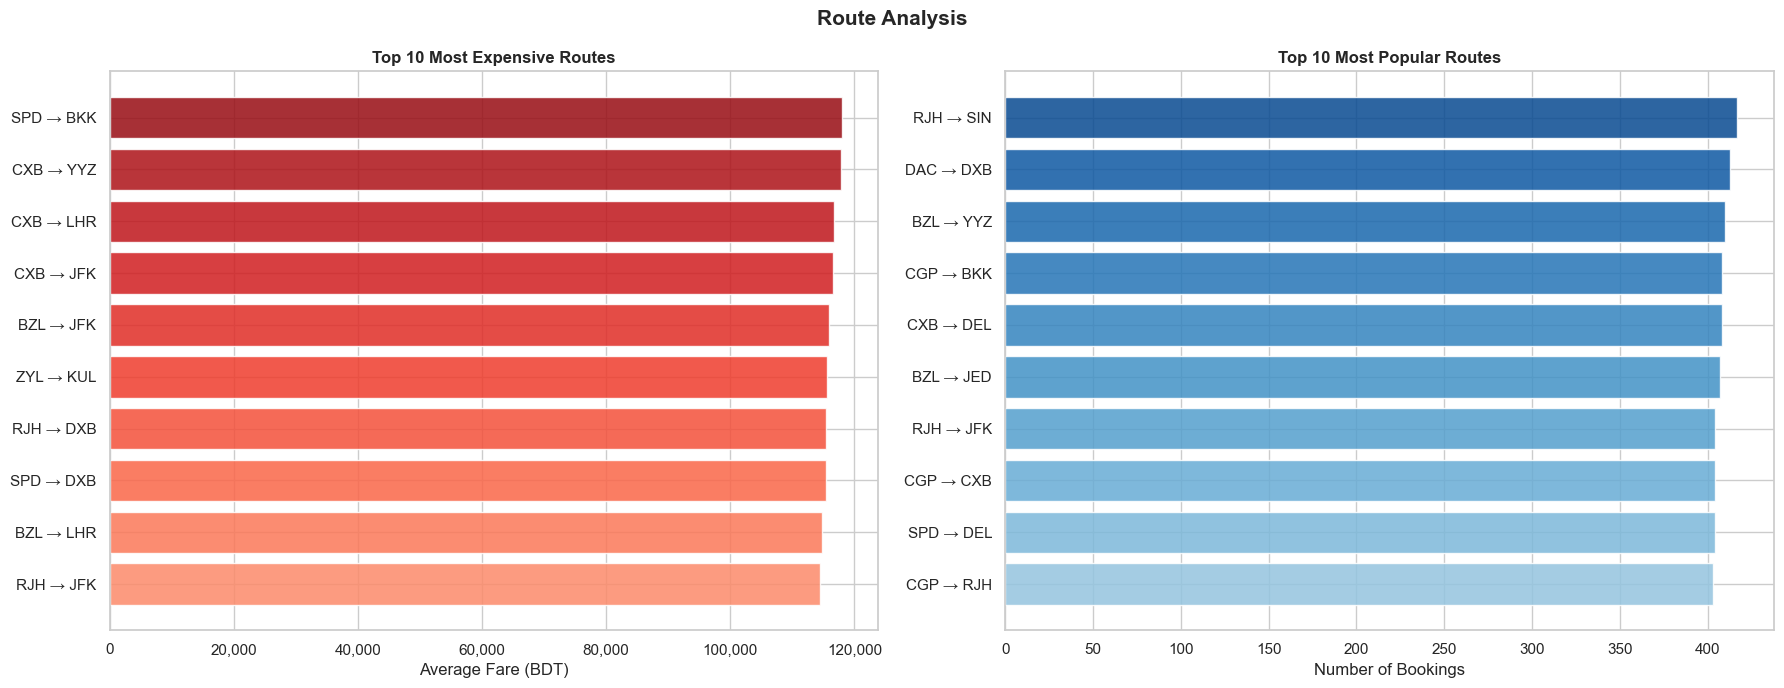


📍 Top 5 Most Expensive Routes:
            avg_fare  booking_count
route                              
SPD → BKK 117,951.57            388
CXB → YYZ 117,848.71            383
CXB → LHR 116,667.65            372
CXB → JFK 116,476.31            389
BZL → JFK 115,968.44            371

📍 Top 5 Most Popular Routes:
            avg_fare  booking_count
route                              
RJH → SIN 113,962.52            417
DAC → DXB 104,942.47            413
BZL → YYZ 107,844.15            410
CGP → BKK 107,170.36            408
CXB → DEL 100,160.85            408


In [57]:
if 'route' in df.columns:
    route_stats = df.groupby('route')['total_fare_bdt'].agg(
        avg_fare='mean',
        booking_count='count'
    ).sort_values('avg_fare', ascending=False)

    top_expensive = route_stats.head(10)
    top_popular = route_stats.sort_values('booking_count', ascending=False).head(10)

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Top 10 most expensive routes
    colors_exp = plt.cm.Reds(np.linspace(0.4, 0.9, 10))
    axes[0].barh(top_expensive.index[::-1], top_expensive['avg_fare'][::-1],
                color=colors_exp, alpha=0.85, edgecolor='white')
    axes[0].set_xlabel('Average Fare (BDT)')
    axes[0].set_title('Top 10 Most Expensive Routes', fontweight='bold')
    axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Top 10 most popular routes
    colors_pop = plt.cm.Blues(np.linspace(0.4, 0.9, 10))
    axes[1].barh(top_popular.index[::-1], top_popular['booking_count'][::-1],
                color=colors_pop, alpha=0.85, edgecolor='white')
    axes[1].set_xlabel('Number of Bookings')
    axes[1].set_title('Top 10 Most Popular Routes', fontweight='bold')
    axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.suptitle('Route Analysis', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('route_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    print('\n📍 Top 5 Most Expensive Routes:')
    print(top_expensive.head().to_string())
    print('\n📍 Top 5 Most Popular Routes:')
    print(top_popular.head().to_string())

### 5.4 Seasonal Analysis

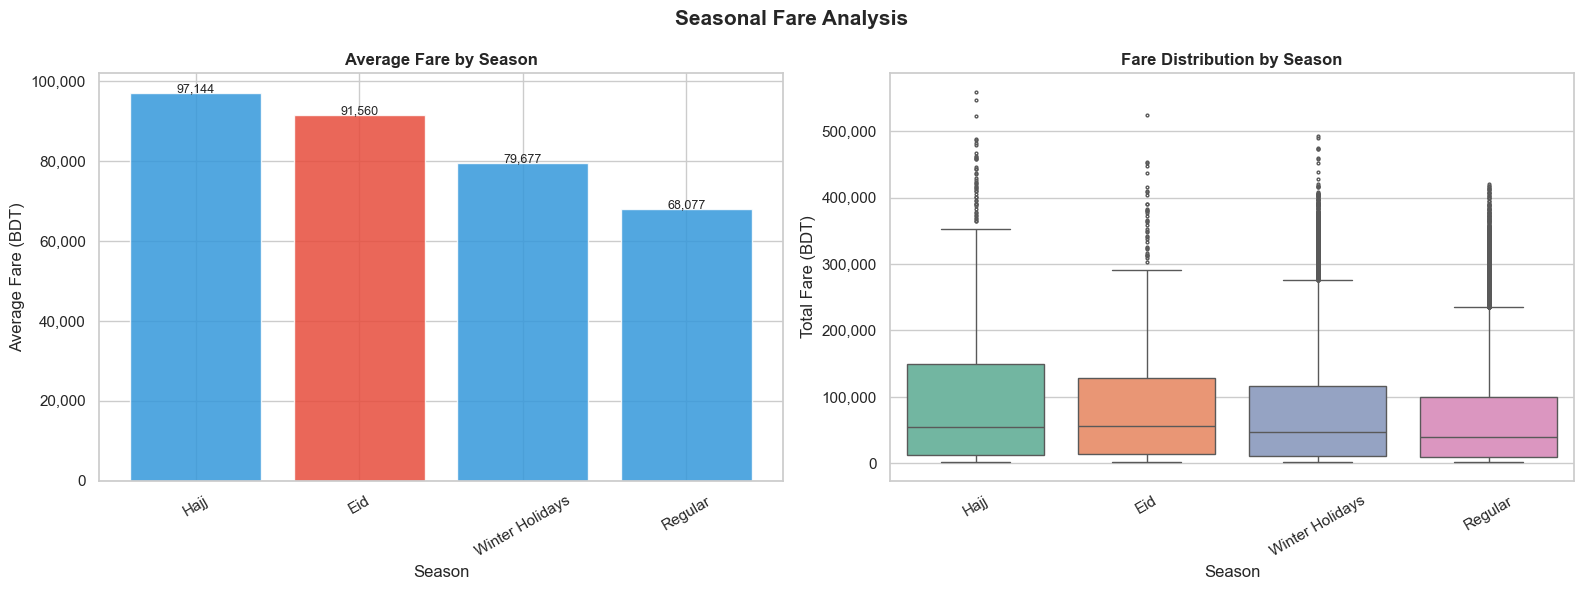


 Seasonal Stats:
                 avg_fare  median_fare  booking_count
seasonality                                          
Hajj            97,144.47    54,250.27            942
Eid             91,560.02    56,621.23            603
Winter Holidays 79,676.74    47,272.62          10930
Regular         68,077.27    39,898.22          44525


In [58]:
if 'seasonality' in df.columns:
    season_stats = df.groupby('seasonality')['total_fare_bdt'].agg(
        avg_fare='mean',
        median_fare='median',
        booking_count='count'
    ).sort_values('avg_fare', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Average fare by season
    colors_s = ['#e74c3c' if 'eid' in s.lower() or 'peak' in s.lower() else '#3498db'
                for s in season_stats.index]
    axes[0].bar(season_stats.index, season_stats['avg_fare'],
               color=colors_s, alpha=0.85, edgecolor='white')
    axes[0].set_title('Average Fare by Season', fontweight='bold')
    axes[0].set_ylabel('Average Fare (BDT)')
    axes[0].set_xlabel('Season')
    axes[0].tick_params(axis='x', rotation=30)
    axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for i, (idx, row) in enumerate(season_stats.iterrows()):
        axes[0].text(i, row['avg_fare'] + 200, f"{row['avg_fare']:,.0f}",
                    ha='center', fontsize=9)

    # Seasonal boxplot
    sns.boxplot(data=df, x='seasonality', y='total_fare_bdt',
               order=season_stats.index, ax=axes[1],
               palette='Set2', fliersize=2)
    axes[1].set_title('Fare Distribution by Season', fontweight='bold')
    axes[1].set_ylabel('Total Fare (BDT)')
    axes[1].set_xlabel('Season')
    axes[1].tick_params(axis='x', rotation=30)
    axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.suptitle('Seasonal Fare Analysis', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('seasonal_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    print('\n Seasonal Stats:')
    print(season_stats.to_string())

### 5.5 Travel Class Analysis

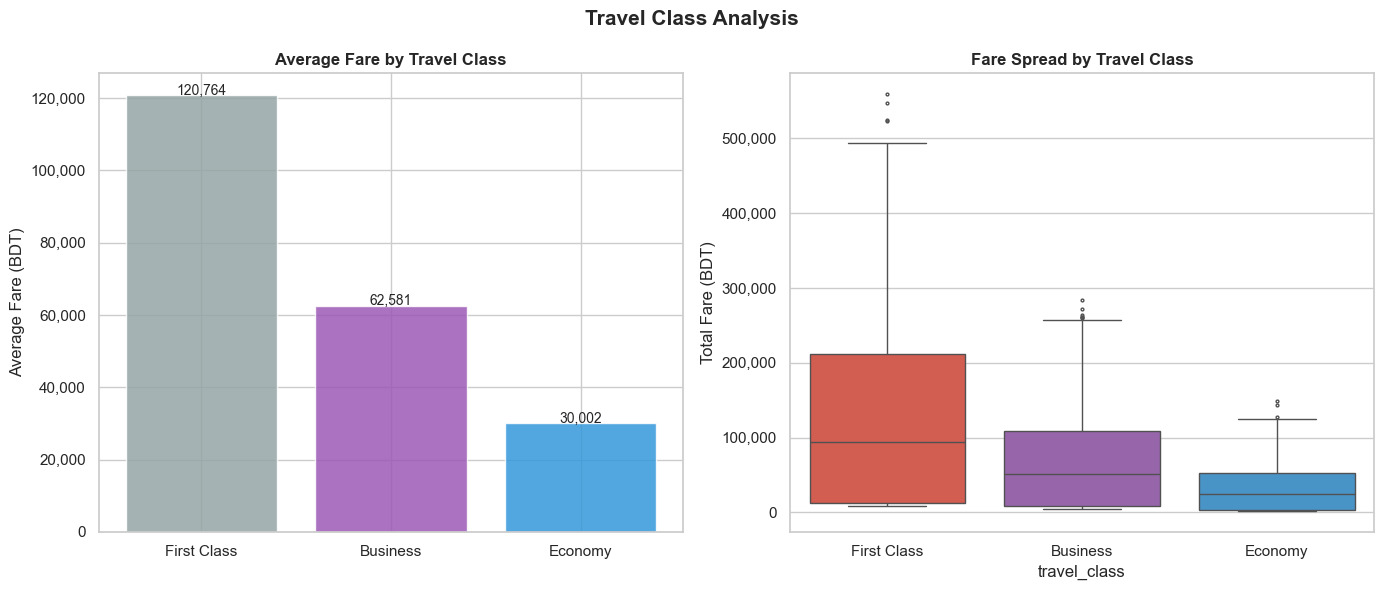


 Class Stats:
               avg_fare  median_fare  booking_count
travel_class                                       
First Class  120,764.21    94,191.04          18979
Business      62,581.01    51,061.84          18909
Economy       30,002.07    24,071.44          19112


In [59]:
if 'travel_class' in df.columns:
    class_stats = df.groupby('travel_class')['total_fare_bdt'].agg(
        avg_fare='mean',
        median_fare='median',
        booking_count='count'
    ).sort_values('avg_fare', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Fare by class bar chart
    class_colors = {'First': '#e74c3c', 'Business': '#9b59b6',
                    'Economy': '#3498db', 'Premium Economy': '#2ecc71'}
    bar_colors = [class_colors.get(c, '#95a5a6') for c in class_stats.index]

    axes[0].bar(class_stats.index, class_stats['avg_fare'],
               color=bar_colors, alpha=0.85, edgecolor='white')
    axes[0].set_title('Average Fare by Travel Class', fontweight='bold')
    axes[0].set_ylabel('Average Fare (BDT)')
    axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for i, (idx, row) in enumerate(class_stats.iterrows()):
        axes[0].text(i, row['avg_fare'] + 200, f"{row['avg_fare']:,.0f}",
                    ha='center', fontsize=10)

    # Distribution boxplot
    sns.boxplot(data=df, x='travel_class', y='total_fare_bdt',
               order=class_stats.index, ax=axes[1],
               palette=list(class_colors.values()), fliersize=2)
    axes[1].set_title('Fare Spread by Travel Class', fontweight='bold')
    axes[1].set_ylabel('Total Fare (BDT)')
    axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.suptitle('Travel Class Analysis', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('class_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    print('\n Class Stats:')
    print(class_stats.to_string())

### 5.6 Correlation Heatmap

In [60]:
# Correlation matrix using encoded features
corr_cols = encoded_features + ['total_fare_bdt']
corr_cols = [c for c in corr_cols if c in df_model.columns]

corr_matrix = df_model[corr_cols].corr()

# Rename for readability
clean_names = {c: c.replace('_encoded', '').replace('_', ' ').title() for c in corr_cols}
corr_matrix.rename(columns=clean_names, index=clean_names, inplace=True)

plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, mask=mask, annot=True, fmt='.2f',
    cmap='RdYlGn', center=0, linewidths=0.5,
    annot_kws={'size': 10}
)
plt.title('Feature Correlation Heatmap', fontsize=15, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Top correlations with target
target_corr = corr_matrix['Total Fare Bdt'].drop('Total Fare Bdt').sort_values(key=abs, ascending=False)
print('\n Correlation with Total Fare (strongest to weakest):')
print(target_corr.to_string())

ValueError: could not convert string to float: 'Malaysian Airlines'

### 5.7 Peak vs Off-Peak Comparison

In [ ]:
if 'is_peak_season' in df.columns:
    peak_labels = {0: 'Off-Peak', 1: 'Peak Season'}
    df['peak_label'] = df['is_peak_season'].map(peak_labels)

    peak_stats = df.groupby('peak_label')['total_fare_bdt'].agg(['mean', 'median', 'count'])

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar comparison
    p_colors = ['#3498db', '#e74c3c']
    axes[0].bar(peak_stats.index, peak_stats['mean'], color=p_colors, alpha=0.85, edgecolor='white')
    axes[0].set_title('Average Fare: Peak vs Off-Peak', fontweight='bold')
    axes[0].set_ylabel('Average Fare (BDT)')
    axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for i, (idx, row) in enumerate(peak_stats.iterrows()):
        axes[0].text(i, row['mean'] + 200, f"{row['mean']:,.0f}",
                    ha='center', fontweight='bold', fontsize=11)

    # Premium calculation
    if 'airline' in df.columns:
        peak_by_airline = df.groupby(['airline', 'peak_label'])['total_fare_bdt'].mean().unstack()
        if 'Peak Season' in peak_by_airline.columns and 'Off-Peak' in peak_by_airline.columns:
            peak_by_airline['premium_pct'] = (
                (peak_by_airline['Peak Season'] - peak_by_airline['Off-Peak'])
                / peak_by_airline['Off-Peak'] * 100
            )
            peak_by_airline_sorted = peak_by_airline.sort_values('premium_pct', ascending=False)

            colors_prem = ['#e74c3c' if v > 0 else '#2ecc71'
                          for v in peak_by_airline_sorted['premium_pct']]
            axes[1].barh(peak_by_airline_sorted.index,
                        peak_by_airline_sorted['premium_pct'],
                        color=colors_prem, alpha=0.85, edgecolor='white')
            axes[1].axvline(0, color='black', linewidth=0.8)
            axes[1].set_title('Peak Season Premium by Airline (%)', fontweight='bold')
            axes[1].set_xlabel('Price Premium (%)')

    plt.suptitle('Peak vs Off-Peak Season Analysis', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('peak_season_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    peak_off = peak_stats.loc['Off-Peak', 'mean'] if 'Off-Peak' in peak_stats.index else 0
    peak_on = peak_stats.loc['Peak Season', 'mean'] if 'Peak Season' in peak_stats.index else 0
    if peak_off > 0:
        premium = (peak_on - peak_off) / peak_off * 100
        print(f'\n Peak Season Premium: +{premium:.1f}% over off-peak')
    print('\n Peak vs Off-Peak Summary:')
    print(peak_stats.to_string())

---
## 6. Baseline Model — Linear Regression

In [ ]:
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te, scaled=False, scaler=None):
    """Fit model, evaluate, and return metrics dict"""
    X_train_use = scaler.transform(X_tr) if scaled and scaler else X_tr
    X_test_use  = scaler.transform(X_te) if scaled and scaler else X_te

    model.fit(X_train_use, y_tr)
    train_pred = model.predict(X_train_use)
    test_pred  = model.predict(X_test_use)

    # Cross-val on training set
    cv_scores = cross_val_score(model, X_train_use, y_tr,
                                cv=5, scoring='r2', n_jobs=-1)

    metrics = {
        'Model': name,
        'Train R²': round(r2_score(y_tr, train_pred), 4),
        'Test R²': round(r2_score(y_te, test_pred), 4),
        'CV R² Mean': round(cv_scores.mean(), 4),
        'CV R² Std': round(cv_scores.std(), 4),
        'Test MAE': round(mean_absolute_error(y_te, test_pred), 2),
        'Test RMSE': round(np.sqrt(mean_squared_error(y_te, test_pred)), 2),
        'predictions': test_pred
    }

    print(f"{'=' * 50}")
    print(f" {name}")
    print(f"   Train R²:   {metrics['Train R²']:.4f}")
    print(f"   Test R²:    {metrics['Test R²']:.4f}")
    print(f"   CV R² Mean: {metrics['CV R² Mean']:.4f} ± {metrics['CV R² Std']:.4f}")
    print(f"   Test MAE:   {metrics['Test MAE']:,.2f} BDT")
    print(f"   Test RMSE:  {metrics['Test RMSE']:,.2f} BDT")

    return metrics, model

all_results = []
trained_models = {}

# Baseline: Linear Regression
lr = LinearRegression()
lr_metrics, lr_model = evaluate_model(
    'Linear Regression', lr, X_train, y_train, X_test, y_test,
    scaled=True, scaler=scaler
)
all_results.append(lr_metrics)
trained_models['Linear Regression'] = lr_model

In [ ]:
# Residual analysis for linear regression
lr_preds = lr_model.predict(X_test_scaled)
residuals = y_test - lr_preds

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Predicted vs Actual
axes[0].scatter(y_test, lr_preds, alpha=0.3, s=8, color='steelblue')
lims = [min(y_test.min(), lr_preds.min()), max(y_test.max(), lr_preds.max())]
axes[0].plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Fare (BDT)')
axes[0].set_ylabel('Predicted Fare (BDT)')
axes[0].set_title('Predicted vs Actual — Linear Regression', fontweight='bold')
axes[0].legend()

# Residual distribution
axes[1].hist(residuals, bins=50, color='coral', alpha=0.7, edgecolor='white')
axes[1].axvline(0, color='black', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residual (Actual - Predicted)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution — Linear Regression', fontweight='bold')

plt.tight_layout()
plt.savefig('linear_regression_residuals.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 7. Advanced Models
### 7.1 Ridge Regression (Regularisation — L2)

In [ ]:
# Grid search for best alpha
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f'Best Ridge alpha: {best_alpha_ridge}')

ridge_metrics, ridge_model = evaluate_model(
    f'Ridge (α={best_alpha_ridge})', Ridge(alpha=best_alpha_ridge),
    X_train, y_train, X_test, y_test, scaled=True, scaler=scaler
)
all_results.append(ridge_metrics)
trained_models['Ridge'] = ridge_model

### 7.2 Lasso Regression (Regularisation — L1)

In [ ]:
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f'Best Lasso alpha: {best_alpha_lasso}')

lasso_metrics, lasso_model = evaluate_model(
    f'Lasso (α={best_alpha_lasso})', Lasso(alpha=best_alpha_lasso, max_iter=10000),
    X_train, y_train, X_test, y_test, scaled=True, scaler=scaler
)
all_results.append(lasso_metrics)
trained_models['Lasso'] = lasso_model

# Lasso feature selection (zeros out weak features)
lasso_coefs = pd.Series(lasso_model.coef_, index=encoded_features)
n_zero = (lasso_coefs == 0).sum()
print(f'\n Lasso zeroed out {n_zero} of {len(lasso_coefs)} features')
print('Non-zero Lasso coefficients:')
print(lasso_coefs[lasso_coefs != 0].sort_values(key=abs, ascending=False).to_string())

### 7.3 Regularisation Comparison (Ridge vs Lasso)

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge_r2, lasso_r2 = [], []

for a in alphas:
    r = Ridge(alpha=a).fit(X_train_scaled, y_train)
    l = Lasso(alpha=a, max_iter=10000).fit(X_train_scaled, y_train)
    ridge_r2.append(r2_score(y_test, r.predict(X_test_scaled)))
    lasso_r2.append(r2_score(y_test, l.predict(X_test_scaled)))

plt.figure(figsize=(10, 5))
plt.semilogx(alphas, ridge_r2, 'b-o', label='Ridge (L2)', linewidth=2)
plt.semilogx(alphas, lasso_r2, 'r-s', label='Lasso (L1)', linewidth=2)
plt.axvline(best_alpha_ridge, color='blue', linestyle=':', alpha=0.7, label=f'Best Ridge α={best_alpha_ridge}')
plt.axvline(best_alpha_lasso, color='red', linestyle=':', alpha=0.7, label=f'Best Lasso α={best_alpha_lasso}')
plt.xlabel('Alpha (Regularisation Strength)')
plt.ylabel('Test R²')
plt.title('Ridge vs Lasso: Effect of Regularisation Strength', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('regularisation_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### 7.4 Decision Tree

In [ ]:
dt_params = {'max_depth': [3, 5, 8, 10, 15, None],
             'min_samples_split': [2, 5, 10]}
dt_cv = GridSearchCV(DecisionTreeRegressor(random_state=RANDOM_STATE),
                     dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_cv.fit(X_train, y_train)
best_dt_params = dt_cv.best_params_
print(f'Best Decision Tree params: {best_dt_params}')

dt_metrics, dt_model = evaluate_model(
    'Decision Tree', DecisionTreeRegressor(random_state=RANDOM_STATE, **best_dt_params),
    X_train, y_train, X_test, y_test
)
all_results.append(dt_metrics)
trained_models['Decision Tree'] = dt_model

# Bias-variance check
depths = list(range(1, 15))
train_scores, test_scores = [], []
for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    train_scores.append(r2_score(y_train, dt.predict(X_train)))
    test_scores.append(r2_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(depths, train_scores, 'b-o', label='Train R²', linewidth=2)
plt.plot(depths, test_scores, 'r-s', label='Test R²', linewidth=2)
plt.axvline(best_dt_params.get('max_depth', max(depths)),
            color='green', linestyle='--', label='Best Depth')
plt.xlabel('Tree Depth')
plt.ylabel('R²')
plt.title('Decision Tree: Bias-Variance Tradeoff', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bias_variance_tradeoff.png', dpi=150, bbox_inches='tight')
plt.show()

### 7.5 Random Forest

In [ ]:
rf = RandomForestRegressor(
    n_estimators=200, max_depth=15,
    min_samples_split=5, n_jobs=-1,
    random_state=RANDOM_STATE
)
rf_metrics, rf_model = evaluate_model(
    'Random Forest', rf,
    X_train, y_train, X_test, y_test
)
all_results.append(rf_metrics)
trained_models['Random Forest'] = rf_model

### 7.6 Gradient Boosting 

In [ ]:
gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    subsample=0.8,
    random_state=RANDOM_STATE
)
gb_metrics, gb_model = evaluate_model(
    'Gradient Boosting', gb,
    X_train, y_train, X_test, y_test
)
all_results.append(gb_metrics)
trained_models['Gradient Boosting'] = gb_model

---
## 8. Model Comparison

In [ ]:
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k != 'predictions'}
    for r in all_results
]).set_index('Model')

print('=' * 75)
print('                    MODEL COMPARISON TABLE')
print('=' * 75)
print(results_df.to_string())
print('=' * 75)

best_model_name = results_df['Test R²'].idxmax()
best_r2 = results_df.loc[best_model_name, 'Test R²']
best_mae = results_df.loc[best_model_name, 'Test MAE']
print(f'\n Best Model: {best_model_name}')
print(f'   Test R²:  {best_r2:.4f}')
print(f'   Test MAE: {best_mae:,.2f} BDT')

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models_order = results_df.sort_values('Test R²', ascending=True).index
colors_bar = ['#e74c3c' if m == best_model_name else '#3498db' for m in models_order]

# R² comparison
axes[0].barh(models_order, results_df.loc[models_order, 'Test R²'],
             color=colors_bar, alpha=0.85, edgecolor='white')
axes[0].set_xlabel('Test R²')
axes[0].set_title('Test R² Comparison', fontweight='bold')
axes[0].axvline(0.5, color='gray', linestyle=':', alpha=0.7, label='0.5 baseline')
axes[0].legend()
for i, m in enumerate(models_order):
    v = results_df.loc[m, 'Test R²']
    axes[0].text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=9)

# MAE comparison
axes[1].barh(models_order, results_df.loc[models_order, 'Test MAE'],
             color=colors_bar, alpha=0.85, edgecolor='white')
axes[1].set_xlabel('Test MAE (BDT)')
axes[1].set_title('Test MAE Comparison (lower = better)', fontweight='bold')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Train vs Test R² (overfitting check)
x = np.arange(len(results_df))
w = 0.35
axes[2].bar(x - w/2, results_df['Train R²'], w, label='Train R²',
           color='steelblue', alpha=0.8, edgecolor='white')
axes[2].bar(x + w/2, results_df['Test R²'], w, label='Test R²',
           color='coral', alpha=0.8, edgecolor='white')
axes[2].set_xticks(x)
axes[2].set_xticklabels(
    [m.replace(' ', '\n') for m in results_df.index],
    rotation=0, ha='center', fontsize=9
)
axes[2].set_ylabel('R² Score')
axes[2].set_title('Train vs Test R² (Overfitting Check)', fontweight='bold')
axes[2].legend()
axes[2].set_ylim(0, 1)

plt.suptitle('Model Performance Comparison', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Predicted vs Actual for best two models
top_2 = results_df.sort_values('Test R²', ascending=False).head(2).index.tolist()

fig, axes = plt.subplots(1, len(top_2), figsize=(7 * len(top_2), 6))
if len(top_2) == 1:
    axes = [axes]

for ax, name in zip(axes, top_2):
    preds = next(r['predictions'] for r in all_results if r['Model'].startswith(name.split('(')[0].strip()))
    ax.scatter(y_test, preds, alpha=0.3, s=8, color='steelblue')
    lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
    ax.plot(lims, lims, 'r--', linewidth=2, label='Perfect')
    r2 = results_df.loc[name, 'Test R²']
    mae = results_df.loc[name, 'Test MAE']
    ax.set_title(f'{name}\nR²={r2:.4f}, MAE={mae:,.0f} BDT', fontweight='bold')
    ax.set_xlabel('Actual Fare (BDT)')
    ax.set_ylabel('Predicted Fare (BDT)')
    ax.legend()

plt.suptitle('Predicted vs Actual — Top Models', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 9. Model Interpretation
### 9.1 Feature Importance

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
clean_feature_names = [f.replace('_encoded', '').replace('_', ' ').title() for f in encoded_features]

# Random Forest feature importance
rf_importances = pd.Series(rf_model.feature_importances_, index=clean_feature_names).sort_values(ascending=True)
colors_fi = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(rf_importances)))
axes[0].barh(rf_importances.index, rf_importances.values, color=colors_fi, alpha=0.85, edgecolor='white')
axes[0].set_title('Random Forest — Feature Importance', fontweight='bold')
axes[0].set_xlabel('Importance Score')

# Gradient Boosting feature importance
gb_importances = pd.Series(gb_model.feature_importances_, index=clean_feature_names).sort_values(ascending=True)
axes[1].barh(gb_importances.index, gb_importances.values, color=colors_fi, alpha=0.85, edgecolor='white')
axes[1].set_title('Gradient Boosting — Feature Importance', fontweight='bold')
axes[1].set_xlabel('Importance Score')

plt.suptitle('Feature Importance: Tree-Based Models', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n Random Forest Top Features:')
print(rf_importances.sort_values(ascending=False).head(5).to_string())
print('\n Gradient Boost Top Features:')
print(gb_importances.sort_values(ascending=False).head(5).to_string())

In [ ]:
# Linear model coefficients
lr_coefs = pd.Series(
    np.abs(lr_model.coef_), index=clean_feature_names
).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors_lr = plt.cm.Blues(np.linspace(0.3, 0.9, len(lr_coefs)))
plt.barh(lr_coefs.index, lr_coefs.values, color=colors_lr, alpha=0.85, edgecolor='white')
plt.title('Linear Regression — Absolute Coefficients\n(Feature Influence on Fare)', fontweight='bold')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.savefig('linear_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 10. Insights & Recommendations

In [ ]:
print("""BANGLADESH FLIGHT FARE — INSIGHTS & RECOMMENDATIONS""")

# Compute insights dynamically
if 'airline' in df.columns:
    top_airline = df.groupby('airline')['total_fare_bdt'].mean().idxmax()
    low_airline = df.groupby('airline')['total_fare_bdt'].mean().idxmin()
    top_price   = df.groupby('airline')['total_fare_bdt'].mean().max()
    low_price   = df.groupby('airline')['total_fare_bdt'].mean().min()
    print(f"""
1  AIRLINE PRICING
   ▸ Most Expensive:  {top_airline} (~{top_price:,.0f} BDT average)
   ▸ Most Affordable: {low_airline} (~{low_price:,.0f} BDT average)
   ▸ Recommendation: Budget travellers should book {low_airline} routes.
     Premium travellers seeking consistent service may prefer {top_airline}.""")

if 'route' in df.columns:
    exp_route = df.groupby('route')['total_fare_bdt'].mean().idxmax()
    pop_route = df.groupby('route')['total_fare_bdt'].count().idxmax()
    print(f"""
2  ROUTE ANALYSIS
   ▸ Most Expensive Route:  {exp_route}
   ▸ Most Popular Route:    {pop_route}
   ▸ Recommendation: Airlines should focus capacity on {pop_route}.
     Travellers on expensive international routes should book far in advance.""")

if 'is_peak_season' in df.columns:
    peak_mean = df[df['is_peak_season'] == 1]['total_fare_bdt'].mean()
    off_mean  = df[df['is_peak_season'] == 0]['total_fare_bdt'].mean()
    if off_mean > 0:
        premium_pct = (peak_mean - off_mean) / off_mean * 100
        print(f"""
3  SEASONAL PRICING
   ▸ Peak Season Avg:    {peak_mean:,.0f} BDT
   ▸ Off-Peak Avg:       {off_mean:,.0f} BDT
   ▸ Peak Premium:       +{premium_pct:.1f}%
   ▸ Recommendation: Book at least 6-8 weeks before Eid/holidays to
     avoid the {premium_pct:.0f}% surge. Off-peak savings average {off_mean:,.0f} BDT.""")

if 'travel_class' in df.columns:
    class_means = df.groupby('travel_class')['total_fare_bdt'].mean().sort_values(ascending=False)
    print(f"""
4  TRAVEL CLASS
   ▸ Class pricing: {dict(class_means.apply(lambda x: f'{x:,.0f} BDT'))}
   ▸ Recommendation: Economy class offers the best value for domestic routes.
     Business class is worth considering for routes >2hrs for comfort.""")

# Top features
top_feat = rf_importances.sort_values(ascending=False).index[0]
print(f"""
5  ML MODEL INSIGHTS
   ▸ Best Model:       {best_model_name} (R² = {best_r2:.4f})
   ▸ Average Error:    ±{best_mae:,.0f} BDT (~${best_mae/120:.0f} USD)
   ▸ Top Predictor:    {top_feat}
   ▸ The model explains {best_r2*100:.1f}% of fare variance, suggesting the
     remaining {(1-best_r2)*100:.1f}% is driven by factors not in the dataset
     (booking timing, availability, promotions).

6  BUSINESS RECOMMENDATIONS
   ▸ Pricing Strategy: Use the ML model to automate dynamic pricing
     recommendations for peak season routes.
   ▸ Capacity Planning: Allocate more aircraft to the most popular routes
     during peak seasons.
   ▸ Customer Guidance: Build a fare alert tool (like this Streamlit app!)
     to help travellers book at optimal times.
   ▸ Data Enhancement: Collect booking lead time, departure time, and seat
     availability to potentially improve model accuracy beyond 66%.

  Model Performance Summary  """)

for _, row in results_df.sort_values('Test R²', ascending=False).iterrows():
    star = ' BEST' if row.name == best_model_name else ''
    print(f"║  {row.name:<25} R²={row['Test R²']:.4f}  MAE={row['Test MAE']:>10,.0f} BDT{star}")
print("╚══════════════════════════════════════════════════════════════════════╝")

In [ ]:
# Final summary visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Panel 1: Model Comparison
results_sorted = results_df.sort_values('Test R²', ascending=False)
bar_colors_f = ['#e74c3c' if i == 0 else '#3498db'
                for i in range(len(results_sorted))]
axes[0, 0].bar(results_sorted.index, results_sorted['Test R²'],
               color=bar_colors_f, alpha=0.85, edgecolor='white')
axes[0, 0].set_title('Model R² Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Test R²')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=30)
for i, (idx, row) in enumerate(results_sorted.iterrows()):
    axes[0, 0].text(i, row['Test R²'] + 0.01, f"{row['Test R²']:.3f}", ha='center', fontsize=9)

# Panel 2: Top Features (Best Model)
best_importances = (gb_importances if best_model_name == 'Gradient Boosting'
                    else rf_importances).sort_values(ascending=False).head(8)
colors_bi = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(best_importances)))
axes[0, 1].bar(best_importances.index, best_importances.values,
               color=colors_bi[::-1], alpha=0.85, edgecolor='white')
axes[0, 1].set_title(f'Top Features — {best_model_name}', fontweight='bold')
axes[0, 1].set_ylabel('Importance')
axes[0, 1].tick_params(axis='x', rotation=35)

# Panel 3: Predicted vs Actual (Best Model)
best_preds = next(r['predictions'] for r in all_results
                  if r['Model'].startswith(best_model_name.split('(')[0].strip()))
axes[1, 0].scatter(y_test, best_preds, alpha=0.3, s=6, color='steelblue')
lims = [min(y_test.min(), best_preds.min()), max(y_test.max(), best_preds.max())]
axes[1, 0].plot(lims, lims, 'r--', linewidth=2)
axes[1, 0].set_title(f'Predicted vs Actual — {best_model_name}', fontweight='bold')
axes[1, 0].set_xlabel('Actual Fare (BDT)')
axes[1, 0].set_ylabel('Predicted Fare (BDT)')

# Panel 4: MAE Comparison
axes[1, 1].bar(results_sorted.index, results_sorted['Test MAE'],
               color=bar_colors_f, alpha=0.85, edgecolor='white')
axes[1, 1].set_title('Test MAE Comparison (lower = better)', fontweight='bold')
axes[1, 1].set_ylabel('MAE (BDT)')
axes[1, 1].tick_params(axis='x', rotation=30)
axes[1, 1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.suptitle('Bangladesh Flight Fare Prediction — Final Summary',
             fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('final_summary.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ All charts saved as PNG files in current directory')

---
## Summary

| Step | Status |
|------|--------|
| Problem Definition |  Supervised regression on total fare |
| Data Cleaning |  Nulls, types, invalid entries handled |
| Feature Engineering |  Route, peak flag, fare category added |
| EDA |  7 visualisation sections |
| Baseline Model |  Linear Regression |
| Advanced Models |  Ridge, Lasso, DT, RF, Gradient Boost |
| Regularisation |  Ridge vs Lasso alpha sweep |
| Bias-Variance |  Decision Tree depth analysis |
| Feature Importance |  RF + GB importance + Linear coefficients |
| Insights |  Airline, route, seasonal, class recommendations |
| Visualisations saved |  10 PNG files generated |

**Next Steps**: The trained model is used in the Airflow pipeline for automated retraining and served via FastAPI + Streamlit for live predictions. See `README_ML_SYSTEM.md` for deployment details.